In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt

In [97]:
data = pd.read_csv('/content/train.csv')
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Processing Data

In [98]:
# check for duplicate rows in the data
sum(list(data.duplicated()))

0

In [99]:
# Check if data contains any missing values
data.isnull().values.any()

# Yes it does now we will check the percentage of missing values for each column

True

In [100]:
# Writing function for calculating percentage of missing values for all columns in a dataframe

def missingvalues(frame:pd.DataFrame):

  columns = frame.columns.tolist()
  result = {column:(frame[column].isnull().sum()/frame.shape[0])*100 for column in columns}

  return sorted(result.items(), key=lambda x: x[1], reverse=True)

In [101]:
missingvalues(data)

[('PoolQC', 99.52054794520548),
 ('MiscFeature', 96.30136986301369),
 ('Alley', 93.76712328767123),
 ('Fence', 80.75342465753424),
 ('FireplaceQu', 47.26027397260274),
 ('LotFrontage', 17.73972602739726),
 ('GarageType', 5.5479452054794525),
 ('GarageYrBlt', 5.5479452054794525),
 ('GarageFinish', 5.5479452054794525),
 ('GarageQual', 5.5479452054794525),
 ('GarageCond', 5.5479452054794525),
 ('BsmtExposure', 2.6027397260273974),
 ('BsmtFinType2', 2.6027397260273974),
 ('BsmtQual', 2.5342465753424657),
 ('BsmtCond', 2.5342465753424657),
 ('BsmtFinType1', 2.5342465753424657),
 ('MasVnrType', 0.547945205479452),
 ('MasVnrArea', 0.547945205479452),
 ('Electrical', 0.0684931506849315),
 ('Id', 0.0),
 ('MSSubClass', 0.0),
 ('MSZoning', 0.0),
 ('LotArea', 0.0),
 ('Street', 0.0),
 ('LotShape', 0.0),
 ('LandContour', 0.0),
 ('Utilities', 0.0),
 ('LotConfig', 0.0),
 ('LandSlope', 0.0),
 ('Neighborhood', 0.0),
 ('Condition1', 0.0),
 ('Condition2', 0.0),
 ('BldgType', 0.0),
 ('HouseStyle', 0.0),
 (

In [102]:
# We will remove columns having high percentage of missing values
# So here we can see columns like 'PoolQC','MiscFeature', 'Alley', 'Fence' and 'FireplaceQu' have more than 47% of missing values hence we will be removing them.
# column 'LotFrontage' has more than 17% of missing values so we still consider for imputation, we will keep it for now.

In [103]:
# Dropping columns having more than 47% of missing values, also let's remove id column that is just as serial no.
data.drop(['PoolQC','MiscFeature', 'Alley', 'Fence', 'FireplaceQu','Id'], axis=1, inplace=True)


In [104]:
# Let's analyze the columns having missing values
missing_columns = ['LotFrontage','GarageType','GarageYrBlt','GarageFinish','BsmtExposure','GarageQual','GarageCond', 'BsmtQual','BsmtCond', 'BsmtFinType1', 'MasVnrType','MasVnrArea','Electrical', 'BsmtFinType2']

for cols in missing_columns:
  print(cols, data[cols].dtype)

LotFrontage float64
GarageType object
GarageYrBlt float64
GarageFinish object
BsmtExposure object
GarageQual object
GarageCond object
BsmtQual object
BsmtCond object
BsmtFinType1 object
MasVnrType object
MasVnrArea float64
Electrical object
BsmtFinType2 object


In [105]:
# Among the columns having missing values , we can see only 3 columns are having types as float64
# Replacing columns with type object with mode values and type float with median

In [106]:
for col in missing_columns:
    if data[col].dtype=='O':
        data[col] = data[col].fillna(data[col].mode().iloc[0])
    else:
        data[col] = data[col].fillna(data[col].median())

In [107]:
# Checking for mssing values after imputation
missingvalues(data)

[('MSSubClass', 0.0),
 ('MSZoning', 0.0),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('Street', 0.0),
 ('LotShape', 0.0),
 ('LandContour', 0.0),
 ('Utilities', 0.0),
 ('LotConfig', 0.0),
 ('LandSlope', 0.0),
 ('Neighborhood', 0.0),
 ('Condition1', 0.0),
 ('Condition2', 0.0),
 ('BldgType', 0.0),
 ('HouseStyle', 0.0),
 ('OverallQual', 0.0),
 ('OverallCond', 0.0),
 ('YearBuilt', 0.0),
 ('YearRemodAdd', 0.0),
 ('RoofStyle', 0.0),
 ('RoofMatl', 0.0),
 ('Exterior1st', 0.0),
 ('Exterior2nd', 0.0),
 ('MasVnrType', 0.0),
 ('MasVnrArea', 0.0),
 ('ExterQual', 0.0),
 ('ExterCond', 0.0),
 ('Foundation', 0.0),
 ('BsmtQual', 0.0),
 ('BsmtCond', 0.0),
 ('BsmtExposure', 0.0),
 ('BsmtFinType1', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinType2', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('Heating', 0.0),
 ('HeatingQC', 0.0),
 ('CentralAir', 0.0),
 ('Electrical', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.0),
 ('

In [108]:
# As expected there are no columns with missing values now

In [109]:
# Since the dataset size is small i.e 1460 rows and considering the fact we have to divide it further into train and test set we will
# not go with outlier removal approach.

In [110]:
# Before converting non-numeric data to dummy variables let's do EDA on the data we have

# EDA

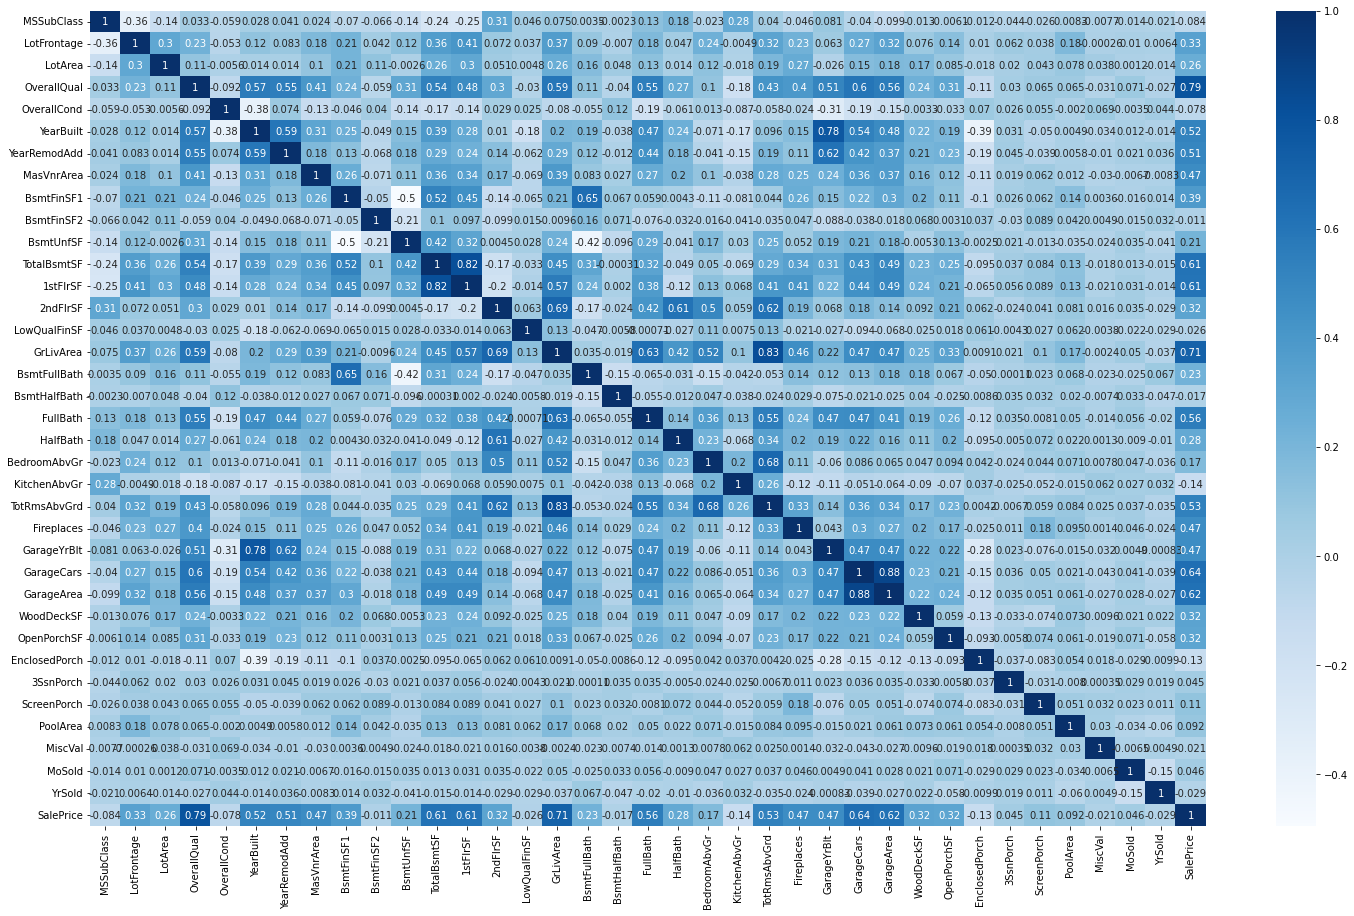

In [111]:
# Plotting Heatmap to check the correlation of features with the target variable

plt.figure(figsize=(25,15))
sns.heatmap(data.corr(), cmap="Blues", annot=True)

 From heatmap we can see target variable 'SalePrice' is having high correlation with feature variables, here we are considering correlation more than 50% like 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFLrSF', 'GrLivArea','FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea'


In [112]:
# Let's visualise numeric data wrt target variable

numerical = data.select_dtypes(include = ['int64', 'float64'])
categorical = data.select_dtypes(include= ['object'])

In [113]:
# Funtion to plot numerical as well as categorical data

def plot_data(rows,cols,frame,y_col=None):

  import warnings
  warnings.filterwarnings("ignore")

  fig, axes = plt.subplots(nrows = rows, ncols = cols, figsize = (30, 150))
  axes = axes.flatten()
  for ax, column in zip(axes, frame.columns):
      if y_col is None:
        sns.distplot(frame[column].dropna(), ax = ax)
      else:
        sns.boxplot( y=data[y_col] , x=frame[column], ax=ax)
      ax.set_title(column, fontsize = 35)
      ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
      ax.tick_params(axis = 'both', which = 'minor', labelsize = 30)
      ax.set_xlabel('')
  fig.tight_layout(rect = [0, 0.03, 1, 0.95])

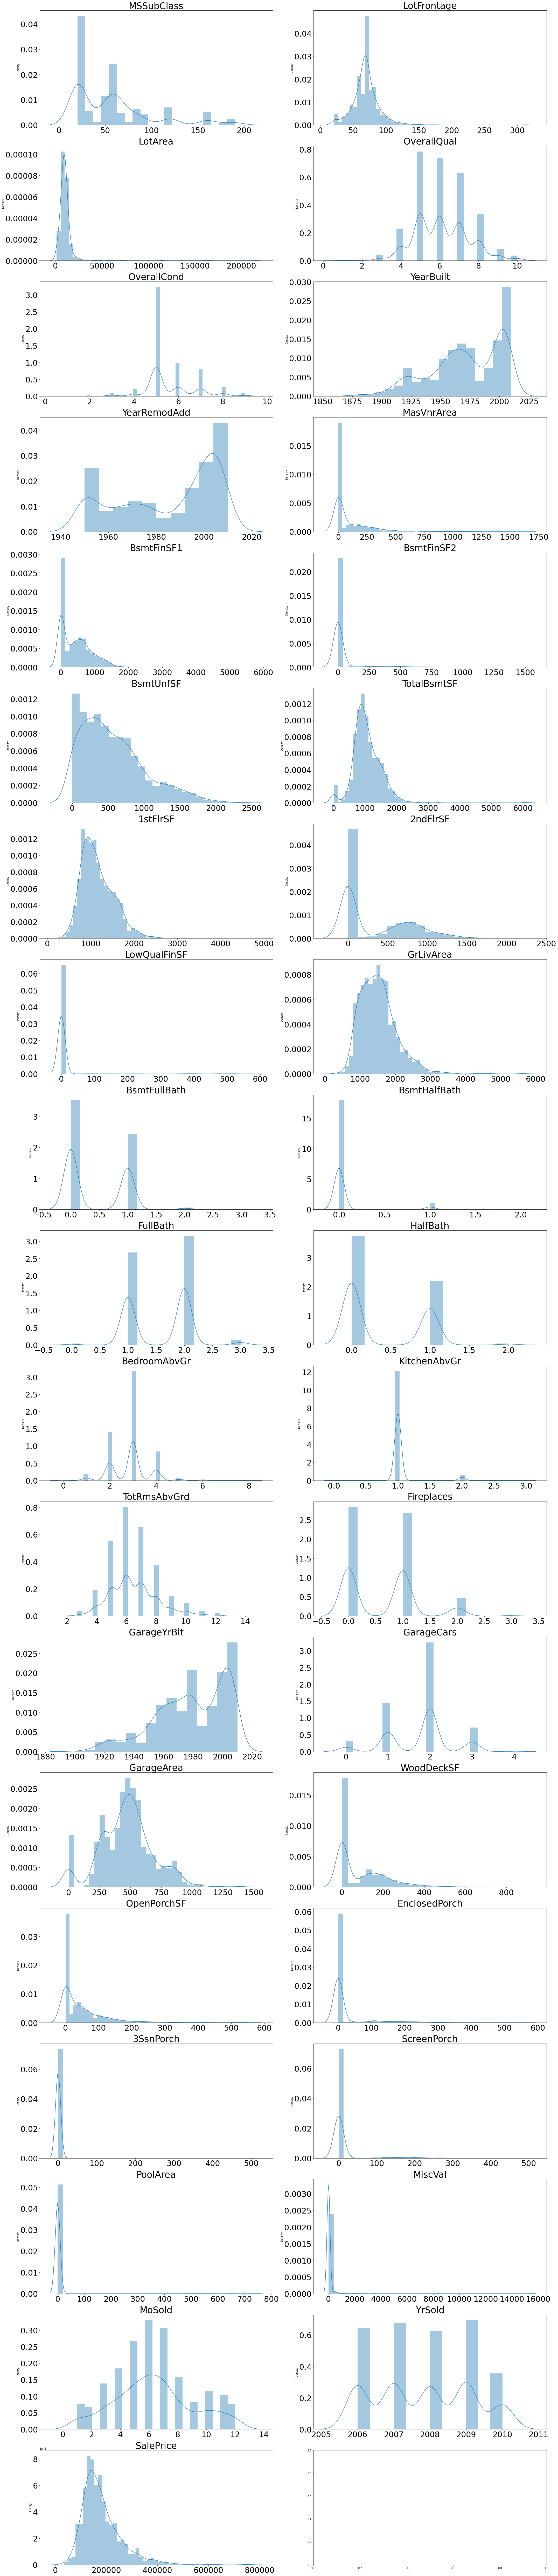

In [114]:
plot_data(19,2,numerical)

1. we can see for some variables the disribution of the data is continuous normal and for some it is discrete normal
2. Since there are too many variables we can change apply any transformations like polynomial regression or data transformation to normalize the distribution.
3. Hence we will go with feature selection and Regularization approach. 

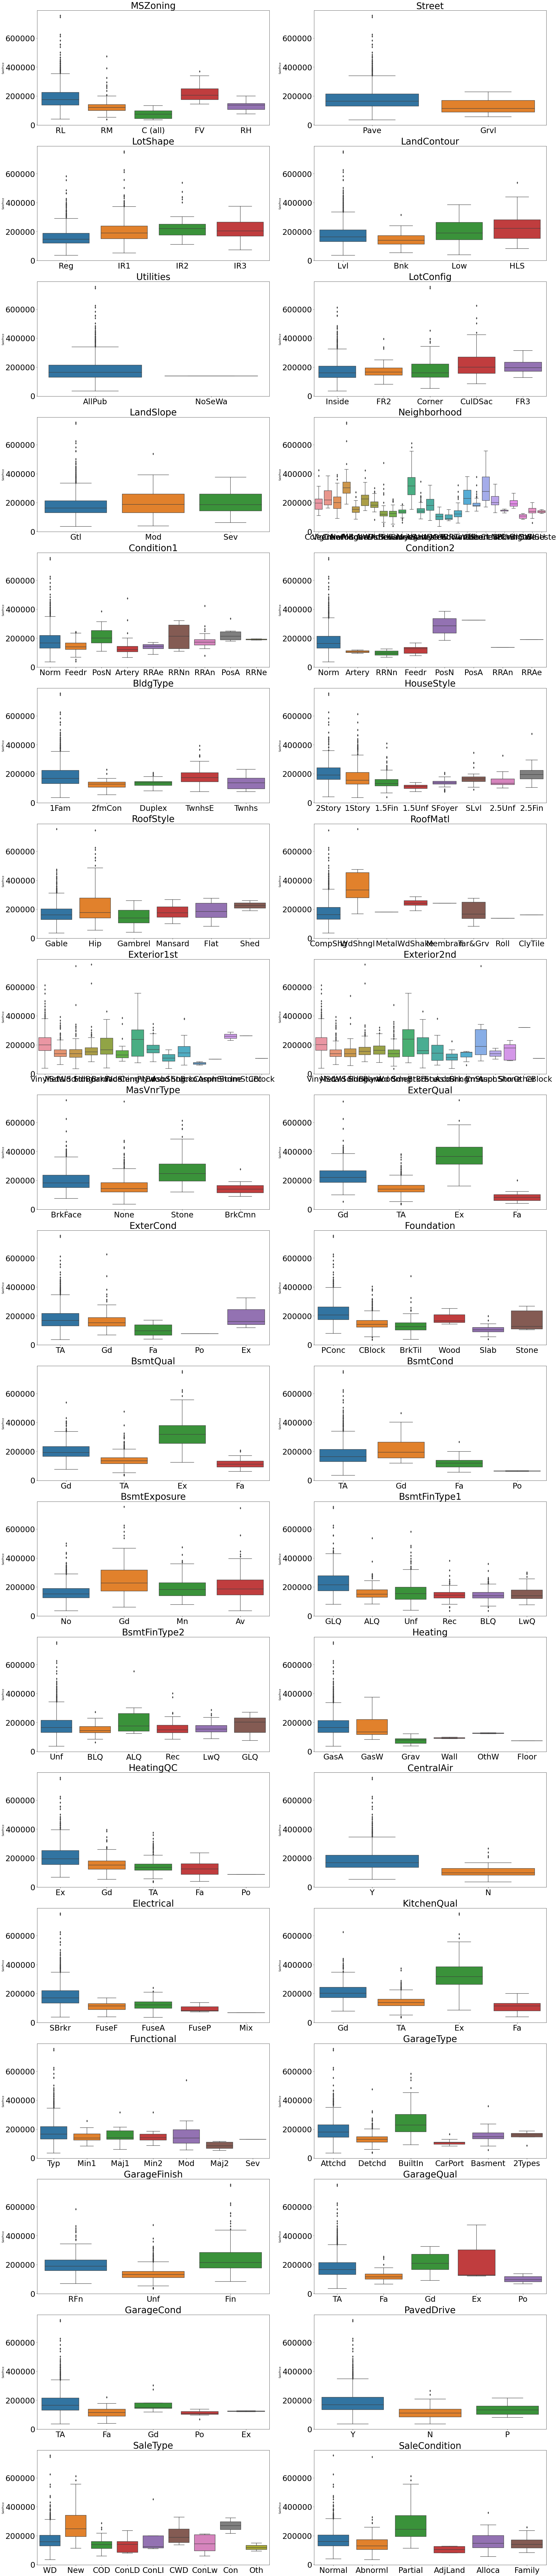

In [116]:
plot_data(19,2,categorical,y_col="SalePrice")

1. we can see for some categorical variables there is a linear relationship between the feature and response column 'SalePrice.
2. Since there are too many variables we can't transform variables individually.
3. Hence we will go with feature selection and Regularization approach. 

# Transforming Categorical variables and splitting data into train and test set

In [117]:
# Now lets handle non-numerical data and replace them with dummies

converted_data = pd.get_dummies(data)

In [118]:
# Splitting data into features and response variables

X = converted_data.drop(['SalePrice'], axis=1)
y = data['SalePrice']


In [119]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=41)

# Scaling Data and LR model building

In [120]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# transform data
scaled_train_data = scaler.fit(X_train)
X_train_scaled = scaled_train_data.transform(X_train)

In [121]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [122]:
# Creating object of Linear Rgression
lr = LinearRegression()

# Fitting Linear Regression object on train data
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [123]:
# Model Evaluation on train and test set

X_train_pred = lr.predict(X_train_scaled)
metrics.r2_score(y_true=y_train, y_pred=X_train_pred)

0.9353929605256281

In [124]:
X_test_scaled = scaled_train_data.transform(X_test)
X_test_pred = lr.predict(X_test_scaled)
metrics.r2_score(y_true=y_test, y_pred=X_test_pred)

-3.47358374221269e+22

In [125]:
# Function to generate  RSS, MSE and RMSE 

def generate_errorscores(orginaldata, predicteddata):
  rss = np.sum(np.square(orginaldata-predicteddata))
  mse = mean_squared_error(orginaldata,predicteddata)
  rmse = sqrt(mse)

  return {'RSS':rss,'MSE':mse,'RMSE':rmse}

In [190]:
rss_list = []
mse_list = []
rmse_list = []

In [191]:
# Generating Score for Train Set

lr_train = generate_errorscores(y_train, X_train_pred)
rss_list.append(lr_train['RSS'])
mse_list.append(lr_train['MSE'])
rmse_list.append(lr_train['RMSE'])

In [193]:
# Generating Score for Test Set

lr_test = generate_errorscores(y_test, X_test_pred)
rss_list.append(lr_test['RSS'])
mse_list.append(lr_test['MSE'])
rmse_list.append(lr_test['RMSE'])

# Model Building using SelectFromModel 

In [130]:
from sklearn.feature_selection import SelectFromModel
 # running SBM for top 100 variables
sfm = SelectFromModel(estimator=lr, max_features=100)            
sfm = sfm.fit(X_train_scaled, y_train)

In [131]:
# Selecting top 100 features from train data

status = sfm.get_support()
features = X_train.columns
selected_columns = features[status]
X_train_sfm = X_train[selected_columns]

In [132]:
# Scaling train data after selecting columns using SBM
# then transform data
scaled_sfm = scaler.fit(X_train_sfm)
X_train_sfm_scaled = scaled_sfm.transform(X_train_sfm)

In [133]:
# training and evaluation model on train set

lr.fit(X_train_sfm_scaled,y_train)
x_train_pred_sfm = lr.predict(X_train_sfm_scaled)
metrics.r2_score(y_true=y_train, y_pred=x_train_pred_sfm)

0.8104836684290846

In [134]:
# Selecting top 100 features from test data

X_test_sfm = X_test[selected_columns]
X_test_sfm_scaled = scaled_sfm.transform(X_test_sfm)

In [135]:
# Eavaluating model on test set
X_test_pred_sfm = lr.predict(X_test_sfm_scaled)
metrics.r2_score(y_true=y_test, y_pred=X_test_pred_sfm)

-2.9609429745796976e+22

In [195]:
# Generating scores for train data

sfm_train = generate_errorscores(y_train, x_train_pred_sfm)
rss_list.append(sfm_train['RSS'])
mse_list.append(sfm_train['MSE'])
rmse_list.append(sfm_train['RMSE'])

In [196]:
# Generating scores for train data

sfm_test = generate_errorscores(y_test, X_test_pred_sfm)
rss_list.append(sfm_test['RSS'])
mse_list.append(sfm_test['MSE'])
rmse_list.append(sfm_test['RMSE'])

# Model Building using RFE Selection

In [138]:
 # running RFE for top 100 variables
rfe = RFE(estimator=lr, n_features_to_select=100)            
rfe = rfe.fit(X_train_scaled, y_train)

In [139]:
# Check the ranks of the columns 
for i,col in enumerate(X_train.columns):
	print('Column: {}, Selected {}, Rank: {}'.format(col, rfe.support_[i], rfe.ranking_[i]))

Column: MSSubClass, Selected False, Rank: 166
Column: LotFrontage, Selected False, Rank: 161
Column: LotArea, Selected False, Rank: 145
Column: OverallQual, Selected False, Rank: 143
Column: OverallCond, Selected False, Rank: 147
Column: YearBuilt, Selected False, Rank: 146
Column: YearRemodAdd, Selected False, Rank: 157
Column: MasVnrArea, Selected False, Rank: 148
Column: BsmtFinSF1, Selected False, Rank: 139
Column: BsmtFinSF2, Selected False, Rank: 142
Column: BsmtUnfSF, Selected False, Rank: 141
Column: TotalBsmtSF, Selected False, Rank: 140
Column: 1stFlrSF, Selected False, Rank: 136
Column: 2ndFlrSF, Selected False, Rank: 135
Column: LowQualFinSF, Selected False, Rank: 138
Column: GrLivArea, Selected False, Rank: 137
Column: BsmtFullBath, Selected False, Rank: 165
Column: BsmtHalfBath, Selected False, Rank: 169
Column: FullBath, Selected False, Rank: 152
Column: HalfBath, Selected False, Rank: 162
Column: BedroomAbvGr, Selected False, Rank: 151
Column: KitchenAbvGr, Selected Fal

In [140]:
# Get top Selected columns
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]

In [141]:
# Scaling train data after selecting columns using RFE
# then transform data
scaled_rfe = scaler.fit(X_train_rfe)
X_train_rfe_scaled = scaled_rfe.transform(X_train_rfe)

In [142]:
# training and evaluation model on train set
lr.fit(X_train_rfe_scaled,y_train)
x_train_rfe_pred = lr.predict(X_train_rfe_scaled)
metrics.r2_score(y_true=y_train, y_pred=x_train_rfe_pred)

0.6923731179447291

In [143]:
# Scaling test data

X_test_rfe = X_test[col]
X_test_rfe_scaled = scaled_rfe.transform(X_test_rfe)

In [144]:
# Eavaluating model on test set
X_test_rfe_pred = lr.predict(X_test_rfe_scaled)
metrics.r2_score(y_true=y_test, y_pred=X_test_rfe_pred)

-8.64287440345176e+25

In [197]:
# Generating scores for train set

rfe_train = generate_errorscores(y_train, x_train_rfe_pred)
rss_list.append(rfe_train['RSS'])
mse_list.append(rfe_train['MSE'])
rmse_list.append(rfe_train['RMSE'])

In [198]:
# Generating scores for test set

rfe_test = generate_errorscores(y_test, X_test_rfe_pred)
rss_list.append(rfe_test['RSS'])
mse_list.append(rfe_test['MSE'])
rmse_list.append(rfe_test['RMSE'])

We tried building model after scaling the train dataset and also tried building the model after using RFE selection and SelectFromModel but we don't see any improvement in the results as we are achieving good R2 score for train dataset but for test dataset the R2 score is negative, clearly this is a case of Overfitting and now onwards we will try on hand on Lasso and Ridge Regression to overcome this problem.

#Lasso Regularization

In [147]:
# Applying Lasso
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=42)
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000, 1100, 1300, 1500, 1700, 2000 ]}
lasso = Lasso()

search = RandomizedSearchCV(lasso, params, n_iter=200, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv, random_state=42)
          

result = search.fit(X_train_scaled, y_train) 
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -1206682098.1733453
Best Hyperparameters: {'alpha': 1500}


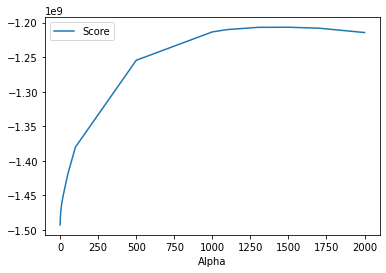

In [148]:
# Plotting graph of alpha wrt to the neg_mean_scored_error

max_depth = [item['alpha'] for item in result.cv_results_['params']]
scores = list(result.cv_results_['mean_test_score'])
d = pd.DataFrame([max_depth, scores]).T
d.columns = ['Alpha',
'Score']
d.groupby(['Alpha']).mean().plot()

Here we can see that after alpha crosses score 1500 it starts showing a decreasing trend, hence we will go with alpha as 1500.

In [149]:
# Fitting Lasso on train set

alpha = 1500
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_scaled, y_train)

Lasso(alpha=1500)

In [150]:
# lasso model coefficients with feature columns
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 181388.569),
 ('MSSubClass', -2410.145),
 ('LotFrontage', 0.0),
 ('LotArea', 2334.07),
 ('OverallQual', 13442.497),
 ('OverallCond', 3998.5),
 ('YearBuilt', 4898.979),
 ('YearRemodAdd', 2587.374),
 ('MasVnrArea', 2953.733),
 ('BsmtFinSF1', 7463.281),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 5168.137),
 ('1stFlrSF', 275.433),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -448.711),
 ('GrLivArea', 26432.764),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', -0.0),
 ('FullBath', 1025.74),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -1258.22),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', 1767.883),
 ('GarageYrBlt', 0.0),
 ('GarageCars', 2965.258),
 ('GarageArea', 4078.881),
 ('WoodDeckSF', 419.422),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 291.755),
 ('PoolArea', 1570.993),
 ('MiscVal', -0.0),
 ('MoSold', -722.507),
 ('YrSold', -0.0),
 ('MSZoning_C (all)', -298.908),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0)

In [151]:
# prediction on the test set(Using R2)
X_train_pred_lasso = lasso.predict(X_train_scaled)
print(metrics.r2_score(y_true=y_train, y_pred=X_train_pred_lasso))
X_test_pred_lasso = lasso.predict(X_test_scaled)
print(metrics.r2_score(y_true=y_test, y_pred=X_test_pred_lasso))

0.9124084695146625
0.893658471643452


In [199]:
# Generating Score for Train set

lasso_train = generate_errorscores(y_train, X_train_pred_lasso)
rss_list.append(lasso_train['RSS'])
mse_list.append(lasso_train['MSE'])
rmse_list.append(lasso_train['RMSE'])

In [200]:
# Generating Score for Test set

lasso_test = generate_errorscores(y_test, X_test_pred_lasso)
rss_list.append(lasso_test['RSS'])
mse_list.append(lasso_test['MSE'])
rmse_list.append(lasso_test['RMSE'])

# Ridge Regularization

In [154]:
# Applying Ridge
from sklearn.linear_model import Ridge

cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=42)
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000, 1100, 1300, 1500, 1700, 2000 ]}
ridge = Ridge()

search = RandomizedSearchCV(ridge, params, n_iter=200, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv, random_state=42)           

result = search.fit(X_train_scaled, y_train) 
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -1143801180.2922752
Best Hyperparameters: {'alpha': 500}


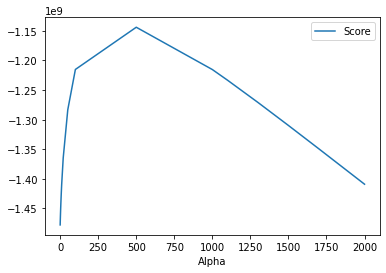

In [155]:
# Plotting graph of alpha wrt to the neg_mean_scored_error

max_depth_rg = [item['alpha'] for item in result.cv_results_['params']]
scores_rg = list(result.cv_results_['mean_test_score'])
d_rg = pd.DataFrame([max_depth_rg, scores_rg]).T
d_rg.columns = ['Alpha',
'Score']
d_rg.groupby(['Alpha']).mean().plot()

Here we can notice that after alpha crosses 500 mark the neg_mean_scored_error starts decreasing so we will go with alpha = 500

In [156]:
# lasso regression
rg = Ridge(alpha=500)
rg.fit(X_train_scaled, y_train)

# prediction on the train and test set
X_train_pred_ridge = rg.predict(X_train_scaled)
print('Training R2 Score : {}'.format(metrics.r2_score(y_true=y_train, y_pred=X_train_pred_ridge)))
X_test_pred_ridge = rg.predict(X_test_scaled)
print('Testing R2 Score : {}'.format(metrics.r2_score(y_true=y_test, y_pred=X_test_pred_ridge)))

Training R2 Score : 0.9134788528730804
Testing R2 Score : 0.8844321762039363


In [201]:
# Generating Score for Train set

ridge_train = generate_errorscores(y_train, X_train_pred_ridge)
rss_list.append(ridge_train['RSS'])
mse_list.append(ridge_train['MSE'])
rmse_list.append(ridge_train['RMSE'])

In [202]:
# Generating Score for Test set

ridge_test = generate_errorscores(y_test, X_test_pred_ridge)
rss_list.append(ridge_test['RSS'])
mse_list.append(ridge_test['MSE'])
rmse_list.append(ridge_test['RMSE'])

In [159]:
# lasso model coefficients along with feature names

model_parameters_rg = list(rg.coef_ )
model_parameters_rg.insert(0, rg.intercept_)
model_parameters_rg = [round(x, 3) for x in model_parameters_rg]
cols_rg = X.columns
cols_rg = cols_rg.insert(0, "constant")
list(zip(cols_rg, model_parameters_rg))

[('constant', 181388.569),
 ('MSSubClass', -1604.171),
 ('LotFrontage', 855.805),
 ('LotArea', 2841.941),
 ('OverallQual', 6900.668),
 ('OverallCond', 3071.459),
 ('YearBuilt', 1280.729),
 ('YearRemodAdd', 2175.956),
 ('MasVnrArea', 4180.898),
 ('BsmtFinSF1', 3894.593),
 ('BsmtFinSF2', 266.487),
 ('BsmtUnfSF', 330.927),
 ('TotalBsmtSF', 4436.932),
 ('1stFlrSF', 5809.926),
 ('2ndFlrSF', 4703.471),
 ('LowQualFinSF', -320.405),
 ('GrLivArea', 8024.487),
 ('BsmtFullBath', 1501.605),
 ('BsmtHalfBath', -269.53),
 ('FullBath', 4026.006),
 ('HalfBath', 2050.399),
 ('BedroomAbvGr', 150.912),
 ('KitchenAbvGr', -1595.121),
 ('TotRmsAbvGrd', 4189.121),
 ('Fireplaces', 3155.824),
 ('GarageYrBlt', 737.625),
 ('GarageCars', 4047.55),
 ('GarageArea', 4029.646),
 ('WoodDeckSF', 1835.489),
 ('OpenPorchSF', 659.834),
 ('EnclosedPorch', 129.903),
 ('3SsnPorch', 665.965),
 ('ScreenPorch', 1734.87),
 ('PoolArea', 1938.328),
 ('MiscVal', -300.915),
 ('MoSold', -1211.704),
 ('YrSold', -456.096),
 ('MSZoning_C

# Analysing Results

In [160]:
# Creating Dataframe with features and Lasso & Ridge regression coefficients

betas_x = cols_rg
betas = pd.DataFrame(index=betas_x,
                     columns=['Lasso','Ridge'])

betas['Ridge'] = model_parameters_rg
betas['Lasso'] = model_parameters

In [161]:
betas.sort_values(by=['Lasso','Ridge'], ascending=False).head(10)

,Lasso,Ridge
constant,181388.569,181388.569
GrLivArea,26432.764,8024.487
OverallQual,13442.497,6900.668
BsmtFinSF1,7463.281,3894.593
BsmtQual_Ex,7322.040,5684.535
KitchenQual_Ex,6365.928,5391.526
Neighborhood_NoRidge,6256.568,5828.913
TotalBsmtSF,5168.137,4436.932
Neighborhood_StoneBr,5026.695,4525.662
YearBuilt,4898.979,1280.729


In [162]:
 #Check for features that were reduced to 0 by Ridge
 print(sum(betas['Ridge'] != 0))

#Check for features that were reduced to 0 by Lasso
 sum(betas['Lasso'] != 0)

267


62

In [163]:
# Creating Dataframe for analysing the results from different models that we created.

frame = pd.DataFrame(index=['LinearRegression_trainset','LinearRegression_testset',
                            'SelectFromModel_trainset', 'SelectFromModel_testset',
                            'RFE_trainset','RFE_testset',
                            'Lasso_trainset','Lasso_testset',
                            'Ridge_trainset', 'Ridge_trainset'],
                     columns = ['R2','RSS','MSE','RMSE','Selected_Features'])

In [203]:
# Collecting Resuts and adding them to columns of the dataframe

frame['R2']  = [93.53,-3.47,81.04,-2.96,69.23,-8.64,91.24,89.36,91.34,88.34]
frame['RSS'] = rss_list
frame['MSE'] = mse_list
frame['RMSE'] = rmse_list

frame['Selected_Features'] = ['All','All',100,100,100,100,62,62,267,267]

In [204]:
frame

,R2,RSS,MSE,RMSE,Selected_Features
LinearRegression_trainset,93.53,4.784363e+11,4.369282e+08,2.090283e+04,All
LinearRegression_testset,-3.47,6.258100e+34,1.714548e+32,1.309408e+16,All
SelectFromModel_trainset,81.04,1.403431e+12,1.281672e+09,3.580044e+04,100
SelectFromModel_testset,-2.96,5.334513e+34,1.461510e+32,1.208929e+16,100
RFE_trainset,69.23,2.278078e+12,2.080437e+09,4.561180e+04,100
RFE_testset,-8.64,1.557123e+38,4.266091e+35,6.531532e+17,100
Lasso_trainset,91.24,6.486440e+11,5.923690e+08,2.433863e+04,62
Lasso_testset,89.36,1.915877e+11,5.248978e+08,2.291065e+04,62
Ridge_trainset,91.34,6.407175e+11,5.851301e+08,2.418946e+04,267
Ridge_trainset,88.34,2.082100e+11,5.704385e+08,2.388385e+04,267


Here we can see that the LinearRegression model has the highest R2 score for train set but it suffers overfitting , Ridge has a score of 91.34 but since it is using almost all the features then R2 score can increase because of that whereas Lasso model is just using 62 feature variables and has reduced most of the features to 0 , hence we will go with the Lasso model.

To answer below questions by the company:

Q1. Which variables are significant in predicting the price of a house? <br>
Ans: We have found 62 most relevant variables that are very significant in predicting the price of a house , the top 5 features in those 62 are as below: <br>

*   GrLivArea <br>
*   OverallQual <br>
*   BsmtFinSF1 <br>
*   BsmtQual <br>
*   KitchenQual <br>

Q2. How well those variables describe the price of a house? <br>
Ans: From business aspect larger the ground area of the living area higher the price, hgher quality of the house increase the price of the land, same reason goes for Kitchen Quality, Basement Quality and Finished Basment.

# Subjective based Questions

In the subjective questions we have to answer some questions by modifying our code.

1. What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Here we will double the value of alpha and then see the most important predictor variables.

# Modified Lasso Regularization

In [166]:
# Fitting Lasso on train set

alpha = 2*1500
lasso_mod = Lasso(alpha=alpha)

lasso_mod.fit(X_train_scaled, y_train)

Lasso(alpha=3000)

In [167]:
# lasso model coefficients with feature columns
model_parameters_lasso_mod = list(lasso_mod.coef_ )
model_parameters_lasso_mod.insert(0, lasso_mod.intercept_)
model_parameters_lasso_mod = [round(x, 3) for x in model_parameters_lasso_mod]
cols_mod = X.columns
cols_mod = cols_mod.insert(0, "constant")
mapped_data = list(zip(cols_mod, model_parameters_lasso_mod))

In [168]:
sorted(dict(mapped_data).items(), key=lambda x: x[1], reverse=True)

[('constant', 181388.569),
 ('GrLivArea', 24230.12),
 ('OverallQual', 17410.531),
 ('BsmtQual_Ex', 7491.096),
 ('BsmtFinSF1', 6674.535),
 ('KitchenQual_Ex', 5924.626),
 ('Neighborhood_NoRidge', 5462.436),
 ('TotalBsmtSF', 5216.127),
 ('GarageCars', 4307.123),
 ('YearBuilt', 4261.204),
 ('Neighborhood_StoneBr', 3451.6),
 ('SaleType_New', 3262.01),
 ('Neighborhood_NridgHt', 3251.426),
 ('GarageArea', 3145.321),
 ('ExterQual_Ex', 3055.989),
 ('YearRemodAdd', 2819.619),
 ('BsmtExposure_Gd', 2810.427),
 ('MasVnrArea', 2439.47),
 ('RoofMatl_WdShngl', 2382.409),
 ('BldgType_1Fam', 2359.064),
 ('OverallCond', 2190.973),
 ('Fireplaces', 2175.842),
 ('LotArea', 1853.64),
 ('LotConfig_CulDSac', 1298.187),
 ('HeatingQC_Ex', 1246.943),
 ('Neighborhood_Crawfor', 1091.294),
 ('Functional_Typ', 687.2),
 ('1stFlrSF', 540.0),
 ('BsmtFinType1_GLQ', 498.324),
 ('Condition1_Norm', 317.541),
 ('WoodDeckSF', 29.25),
 ('GarageFinish_Fin', 25.931),
 ('LotFrontage', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0

In [169]:
# prediction on the test set(Using R2)
X_train_pred_lasso_mod = lasso.predict(X_train_scaled)
print(metrics.r2_score(y_true=y_train, y_pred=X_train_pred_lasso_mod))
X_test_pred_lasso_mod = lasso.predict(X_test_scaled)
print(metrics.r2_score(y_true=y_test, y_pred=X_test_pred_lasso_mod))

0.9124084695146625
0.893658471643452


In [170]:
# Generating Score for Train set

generate_errorscores(y_train, X_train_pred_lasso)

{'MSE': 592368972.9352636,
 'RMSE': 24338.631287220396,
 'RSS': 648644025364.1136}

In [171]:
# Generating Score for Test set

generate_errorscores(y_test, X_test_pred_lasso)

{'MSE': 524897833.27929336,
 'RMSE': 22910.648905679067,
 'RSS': 191587709146.94208}

By increasing the alpha two times we can observe that the training R2 Score has dropped a bit, also the most important predictor variables remained the same but the coefficients increased for most of the predictor variables.

# Modified Ridge Regularization

Here we can notice that after alpha crosses 500 mark the neg_mean_scored_error starts decreasing so we will go with alpha = 500

In [172]:
# lasso regression
alpha_ridge=2*500
rg_mod = Ridge(alpha=alpha_ridge)
rg_mod.fit(X_train_scaled, y_train)

# prediction on the train and test set
X_train_pred_ridge_mod = rg.predict(X_train_scaled)
print('Training R2 Score : {}'.format(metrics.r2_score(y_true=y_train, y_pred=X_train_pred_ridge_mod)))
X_test_pred_ridge_mod = rg.predict(X_test_scaled)
print('Testing R2 Score : {}'.format(metrics.r2_score(y_true=y_test, y_pred=X_test_pred_ridge_mod)))

Training R2 Score : 0.9134788528730804
Testing R2 Score : 0.8844321762039363


In [173]:
# Generating Score for Train set

generate_errorscores(y_train, X_train_pred_ridge_mod)

{'MSE': 585130123.617758, 'RMSE': 24189.463070059202, 'RSS': 640717485361.4451}

In [174]:
# Generating Score for Test set

generate_errorscores(y_test, X_test_pred_ridge_mod)

{'MSE': 570438484.8031176,
 'RMSE': 23883.854060915663,
 'RSS': 208210046953.13794}

In [175]:
# lasso model coefficients along with feature names

model_parameters_rg_mod = list(rg_mod.coef_ )
model_parameters_rg_mod.insert(0, rg_mod.intercept_)
model_parameters_rg_mod = [round(x, 3) for x in model_parameters_rg_mod]
cols_rg_mod = X.columns
cols_rg_mod = cols_rg_mod.insert(0, "constant")
mapped_ridge = list(zip(cols_rg_mod, model_parameters_rg_mod))

In [176]:
sorted(dict(mapped_ridge).items(), key=lambda x: x[1], reverse=True)

[('constant', 181388.569),
 ('GrLivArea', 6611.82),
 ('OverallQual', 6098.739),
 ('BsmtQual_Ex', 5145.113),
 ('KitchenQual_Ex', 4936.118),
 ('Neighborhood_NoRidge', 4928.795),
 ('1stFlrSF', 4922.151),
 ('TotRmsAbvGrd', 4076.594),
 ('GarageCars', 3948.921),
 ('TotalBsmtSF', 3924.373),
 ('GarageArea', 3815.872),
 ('Neighborhood_NridgHt', 3788.411),
 ('MasVnrArea', 3737.908),
 ('2ndFlrSF', 3731.005),
 ('RoofMatl_WdShngl', 3679.526),
 ('Neighborhood_StoneBr', 3611.938),
 ('ExterQual_Ex', 3593.815),
 ('FullBath', 3554.1),
 ('Fireplaces', 3245.354),
 ('BsmtFinSF1', 3214.84),
 ('BsmtExposure_Gd', 2985.087),
 ('LotArea', 2340.674),
 ('BsmtFinType1_GLQ', 2294.572),
 ('LotConfig_CulDSac', 2262.099),
 ('OverallCond', 2223.07),
 ('Neighborhood_Crawfor', 2147.697),
 ('YearRemodAdd', 2089.775),
 ('HalfBath', 1950.461),
 ('WoodDeckSF', 1896.131),
 ('Exterior2nd_ImStucc', 1733.842),
 ('BldgType_1Fam', 1683.455),
 ('SaleType_New', 1679.151),
 ('Exterior1st_BrkFace', 1664.472),
 ('ScreenPorch', 1624.974

In Ridge By increasing the alpha two times we can observe that the training R2 Score hasn't changed much, also the most important predictor variables remained the same with addition of new predictor variable Neighborhood_NoRidge.

 # Lasso Experiment based on Subjective Question

Q2. After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

Ans : The top 5 predictor variables that we got are:
* GrLivArea
* OverallQual
* BsmtFinSF1
* BsmtQual
* KitchenQual

After dropping above variables we found below features to be in the top 5 list:
* BsmtUnfSF
* TotalBsmtSF
* BsmtFinSF2
* MasVnrType_BrkFace
* Neighborhood_NPkVill

In [177]:
lasso_quest_data = data.drop(columns=['GrLivArea','OverallQual','BsmtFinSF1','BsmtQual','KitchenQual'])

In [178]:
lasso_quest_data_dummy = pd.get_dummies(lasso_quest_data)

In [179]:
X_quest = lasso_quest_data_dummy.drop(['SalePrice'], axis=1)
y_quest = data['SalePrice']

In [180]:

X_train_quest, X_test_quest, y_train_quest, y_test_quest = train_test_split(X_quest, y_quest, train_size=0.75, test_size=0.25, random_state=41)

In [181]:
scaler_quest = StandardScaler()
# transform data
scaled_train_data_quest = scaler_quest.fit(X_train_quest)
X_train_scaled_quest = scaled_train_data_quest.transform(X_train_quest)

In [182]:
X_test_scaled_quest = scaled_train_data_quest.transform(X_test_quest)

In [183]:
# Applying Lasso
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=42)
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000, 1100, 1300, 1500, 1700, 2000 ]}
lasso_quest = Lasso()

search_quest = RandomizedSearchCV(lasso_quest, params, n_iter=200, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv, random_state=42)
          

result_quest = search_quest.fit(X_train_scaled_quest, y_train) 
print('Best Score: %s' % result_quest.best_score_)
print('Best Hyperparameters: %s' % result_quest.best_params_)

Best Score: -1326240987.163186
Best Hyperparameters: {'alpha': 1700}


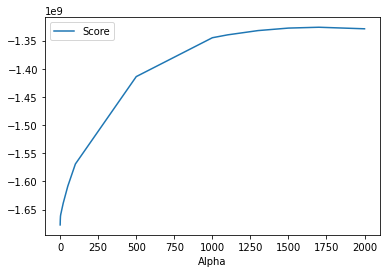

In [184]:
# Plotting graph of alpha wrt to the neg_mean_scored_error

max_depth_quest = [item['alpha'] for item in result_quest.cv_results_['params']]
scores_quest = list(result_quest.cv_results_['mean_test_score'])
d = pd.DataFrame([max_depth_quest, scores_quest]).T
d.columns = ['Alpha',
'Score']
d.groupby(['Alpha']).mean().plot()

In [185]:
# Fitting Lasso on train set

alpha = 1700
lasso_quest_obj = Lasso(alpha=alpha)

lasso_quest_obj.fit(X_train_scaled_quest, y_train)

Lasso(alpha=1700)

In [186]:
# lasso model coefficients with feature columns
model_parameters_lasso_quest_2 = list(lasso_quest_obj.coef_ )
model_parameters_lasso_quest_2.insert(0, lasso_quest_obj.intercept_)
model_parameters_lasso_quest_2 = [round(x, 3) for x in model_parameters_lasso_quest_2]
cols_lasso_quest_2 = X.columns
cols_lasso_quest_2cols_lasso_quest_2 = cols_lasso_quest_2.insert(0, "constant")
mapped_lasso_quest_2 = list(zip(cols, model_parameters_lasso_quest_2))

In [187]:
sorted(dict(mapped_lasso_quest_2).items(), key=lambda x: x[1], reverse=True)

[('constant', 181388.569),
 ('BsmtUnfSF', 21279.919),
 ('TotalBsmtSF', 20870.238),
 ('BsmtFinSF2', 11129.763),
 ('MasVnrType_BrkFace', 9018.227),
 ('Neighborhood_NPkVill', 8647.543),
 ('Neighborhood_Sawyer', 6973.78),
 ('Neighborhood_NAmes', 6325.987),
 ('Fireplaces', 5951.014),
 ('GarageCond_Po', 5081.294),
 ('RoofMatl_Roll', 4865.19),
 ('OverallCond', 4655.236),
 ('Condition2_RRAe', 4548.727),
 ('OverallQual', 4472.08),
 ('BsmtQual_Gd', 4326.15),
 ('YearBuilt', 4027.416),
 ('BedroomAbvGr', 3913.652),
 ('YearRemodAdd', 3779.197),
 ('BsmtCond_TA', 3664.898),
 ('Electrical_SBrkr', 3568.065),
 ('TotRmsAbvGrd', 3404.861),
 ('Neighborhood_BrkSide', 2751.024),
 ('Functional_Min1', 2480.359),
 ('BsmtFinType2_Unf', 2255.272),
 ('EnclosedPorch', 2113.057),
 ('GrLivArea', 1993.16),
 ('Utilities_AllPub', 1927.713),
 ('Neighborhood_SWISU', 1567.542),
 ('LotArea', 1542.315),
 ('ExterCond_TA', 1519.954),
 ('Neighborhood_Veenker', 1410.433),
 ('Exterior1st_AsbShng', 1269.005),
 ('2ndFlrSF', 1003.675

In [188]:
# prediction on the test set(Using R2)
X_train_pred_lasso_quest_2 = lasso_quest_obj.predict(X_train_scaled_quest)
print(metrics.r2_score(y_true=y_train_quest, y_pred=X_train_pred_lasso))
X_test_pred_lasso_quest_2 = lasso_quest_obj.predict(X_test_scaled_quest)
print(metrics.r2_score(y_true=y_test_quest, y_pred=X_test_pred_lasso_quest_2))

0.9124084695146625
0.8783530407526794
